# Simple Stock Price LSTM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
% config InlineBackend.figure_format = 'retina'
import pandas as pd

In [2]:
ls

TSLA-test.csv                         airline.ipynb
TSLA-train.csv                        international-airline-passengers.csv
Tesla.ipynb


In [3]:
training_set = pd.read_csv('./TSLA-train.csv')
training_set.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,28.940001,29.500000,27.650000,28.080000,28.080000,928100
1,2012-01-04,28.209999,28.670000,27.500000,27.709999,27.709999,630100
2,2012-01-05,27.760000,27.930000,26.850000,27.120001,27.120001,1005500
3,2012-01-06,27.200001,27.790001,26.410000,26.910000,26.910000,986300
4,2012-01-09,27.000000,27.490000,26.120001,27.250000,27.250000,897000


In [4]:
training_set.shape

(1258, 7)

In [5]:
test_set = pd.read_csv('./TSLA-test.csv')
test_set.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,214.860001,220.330002,210.960007,216.990005,216.990005,5923300
1,2017-01-04,214.750000,228.000000,214.309998,226.990005,226.990005,11213500
2,2017-01-05,226.419998,227.479996,221.949997,226.750000,226.750000,5911700
3,2017-01-06,226.929993,230.309998,225.449997,229.009995,229.009995,5527900
4,2017-01-09,228.970001,231.919998,228.000000,231.279999,231.279999,3957000


Only one feature, open price

In [6]:
# Getting relevant feature
training_set = training_set.iloc[:,1:2]
training_set.head()

,Open
0,28.940001
1,28.209999
2,27.760000
3,27.200001
4,27.000000


In [7]:
training_set = training_set.values

Feature scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
training_set

array([[0.00888719],
       [0.00609078],
       [0.00436698],
       ...,
       [0.74663853],
       [0.7352614 ],
       [0.72660407]])

Shift one block. Input feature is the current day, output is the next day

In [9]:
X_train = training_set[0:1257]
y_train = training_set[1:1258]

In [10]:
today = pd.DataFrame(X_train[0:5])
tomorrow = pd.DataFrame(y_train[0:5])
ex = pd.concat([today, tomorrow], axis=1)
ex.columns = (['today', 'tomorrow'])
ex

,today,tomorrow
0,0.008887,0.006091
1,0.006091,0.004367
2,0.004367,0.002222
3,0.002222,0.001456
4,0.001456,0.003141


Reshape data into 3 dimensions of [batch_size, timesteps, input_dim] for Keras.
Batch size will be 1257 for amount of data.  <br/>
Timesteps will be 1 for each day. <br/>
Input will be 1 for one data point per observation.


In [11]:
# Reshaping into required shape for Keras
X_train = np.reshape(X_train, (1257, 1, 1))
X_train

array([[[0.00888719]],

       [[0.00609078]],

       [[0.00436698]],

       ...,

       [[0.72116451]],

       [[0.74663853]],

       [[0.7352614 ]]])

RNN Build

In [12]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

/Users/William/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Input layer has sigmoid activation. (None,1) for input shape

In [13]:
model = Sequential()
# Input layer - LSTM 
model.add(LSTM(units = 4, activation = 'relu', input_shape = (None, 1)))

In [14]:
# Output layer
model.add(Dense(units = 1))

In [15]:
# Compile RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [16]:
model.fit(X_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
1257/1257 [==============================] - 1s 580us/step - loss: 0.3557
Epoch 2/200
1257/1257 [==============================] - 0s 81us/step - loss: 0.3138
Epoch 3/200
1257/1257 [==============================] - 0s 82us/step - loss: 0.2770
Epoch 4/200
1257/1257 [==============================] - 0s 78us/step - loss: 0.2411
Epoch 5/200
1257/1257 [==============================] - 0s 81us/step - loss: 0.2042
Epoch 6/200
1257/1257 [==============================] - 0s 80us/step - loss: 0.1665
Epoch 7/200
1257/1257 [==============================] - 0s 82us/step - loss: 0.1310
Epoch 8/200
1257/1257 [==============================] - 0s 81us/step - loss: 0.0992
Epoch 9/200
1257/1257 [==============================] - 0s 82us/step - loss: 0.0745
Epoch 10/200
1257/1257 [==============================] - 0s 81us/step - loss: 0.0583
Epoch 11/200
1257/1257 [==============================] - 0s 80us/step - loss: 0.0493
Epoch 12/200
1257/1257 [==============================] - 0s 8

1257/1257 [==============================] - 0s 93us/step - loss: 7.5362e-04
Epoch 96/200
1257/1257 [==============================] - 0s 88us/step - loss: 7.2870e-04
Epoch 97/200
1257/1257 [==============================] - 0s 85us/step - loss: 7.2143e-04
Epoch 98/200
1257/1257 [==============================] - 0s 82us/step - loss: 7.0861e-04
Epoch 99/200
1257/1257 [==============================] - 0s 84us/step - loss: 6.9433e-04
Epoch 100/200
1257/1257 [==============================] - 0s 82us/step - loss: 6.8436e-04
Epoch 101/200
1257/1257 [==============================] - 0s 80us/step - loss: 6.6805e-04
Epoch 102/200
1257/1257 [==============================] - 0s 81us/step - loss: 6.5914e-04
Epoch 103/200
1257/1257 [==============================] - 0s 79us/step - loss: 6.4677e-04
Epoch 104/200
1257/1257 [==============================] - 0s 83us/step - loss: 6.3958e-04
Epoch 105/200
1257/1257 [==============================] - 0s 81us/step - loss: 6.3014e-04
Epoch 106/200
125

1257/1257 [==============================] - 0s 84us/step - loss: 4.0986e-04
Epoch 186/200
1257/1257 [==============================] - 0s 82us/step - loss: 4.1056e-04
Epoch 187/200
1257/1257 [==============================] - 0s 81us/step - loss: 4.1084e-04
Epoch 188/200
1257/1257 [==============================] - 0s 84us/step - loss: 4.0919e-04
Epoch 189/200
1257/1257 [==============================] - 0s 83us/step - loss: 4.1112e-04
Epoch 190/200
1257/1257 [==============================] - 0s 86us/step - loss: 4.0946e-04
Epoch 191/200
1257/1257 [==============================] - 0s 81us/step - loss: 4.0916e-04
Epoch 192/200
1257/1257 [==============================] - 0s 93us/step - loss: 4.1434e-04
Epoch 193/200
1257/1257 [==============================] - 0s 92us/step - loss: 4.1825e-04
Epoch 194/200
1257/1257 [==============================] - 0s 92us/step - loss: 4.1052e-04
Epoch 195/200
1257/1257 [==============================] - 0s 76us/step - loss: 4.1173e-04
Epoch 196/200

Validation

In [17]:
actual = test_set.iloc[:,1:2]
actual.head()

,Open
0,214.860001
1,214.750000
2,226.419998
3,226.929993
4,228.970001


In [18]:
actual = actual.values

In [19]:
# Creating prediction
actual = sc.transform(actual)
actual = np.reshape(actual, (251, 1, 1))

In [20]:
actual.shape

(251, 1, 1)

In [21]:
predicted_stock_price = model.predict(actual)

In [22]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [23]:
real_stock_price = test_set.iloc[:, 1:2]
real_stock_price = real_stock_price.values

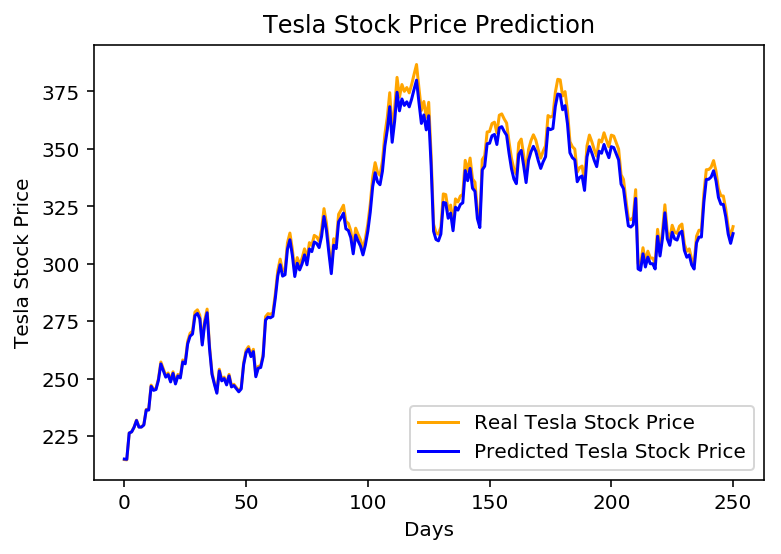

In [24]:
plt.plot(real_stock_price, color = 'orange', label = 'Real Tesla Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Tesla Stock Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()